In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from data_prep import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from eda import *
import seaborn as sns
from rfm_analysis_helperss import * 
#from rfm_analysis_helpers import *

In [2]:
rfm_data = pickle_load("retail_to_rfm_df")

   CUSTOMERID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24


In [3]:
check_all_columns(rfm_data)

Is Recency have outliers ? False
Is Frequency have outliers ? True
Is Monetary have outliers ? True


In [4]:
print_about_columns(rfm_data)

Max value of Recency is 373
Min value of Recency is 0
Mean value of Recency is 92.05947441217151
#####################################
Max value of Frequency is 7847
Min value of Frequency is 1
Mean value of Frequency is 91.72060857538035
Low limit is: -461.22499999999945, Up limit is 779.3749999999991
#####################################
Max value of Monetary is 280206.02
Min value of Monetary is 3.75
Mean value of Monetary is 2054.2664601198735
Low limit is: -8481.990749999983, Up limit is 14436.14324999997
#####################################


In [5]:
multiple_replacement_with_thresholds(rfm_data)

In [6]:
check_all_columns(rfm_data)

Is Recency have outliers ? False
Is Frequency have outliers ? False
Is Monetary have outliers ? False


In [7]:
print_about_columns(rfm_data)

Max value of Recency is 373
Min value of Recency is 0
Mean value of Recency is 92.05947441217151
#####################################
Max value of Frequency is 779.3749999999991
Min value of Frequency is 1.0
Mean value of Frequency is 84.07074112494237
Low limit is: -461.22499999999945, Up limit is 779.3749999999991
#####################################
Max value of Monetary is 14436.14324999997
Min value of Monetary is 3.75
Mean value of Monetary is 1532.8833276855678
Low limit is: -8481.990749999983, Up limit is 14436.14324999997
#####################################


In [8]:
rfm_customerID = drop_index(rfm_data, "CUSTOMERID")

In [9]:
standard_rfm_data = scaled_data(rfm_data, call_scalers(standard=True))
min_max_rfm_data = scaled_data(rfm_data, call_scalers(min_max=True))
unscale_rfm_data = rfm_data.copy()

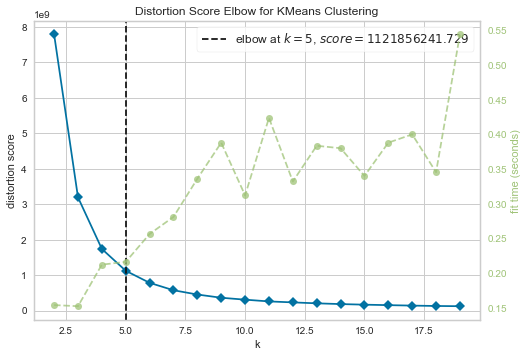

Optimal number of cluster is 5
--------------------------------------------------------------------------------


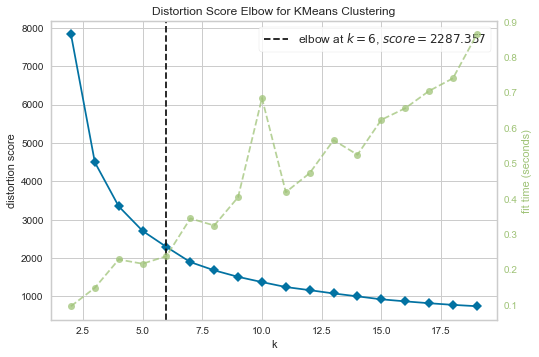

Optimal number of cluster is 6
--------------------------------------------------------------------------------


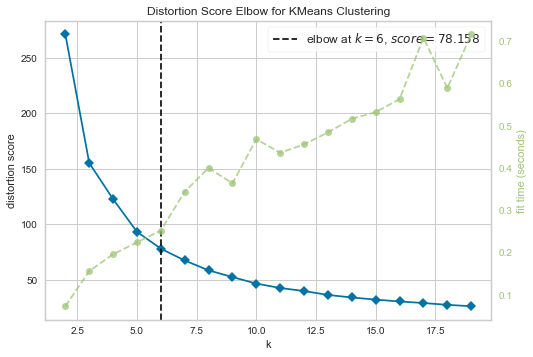

Optimal number of cluster is 6
--------------------------------------------------------------------------------


In [10]:
best_k_unscale = best_k(unscale_rfm_data)
best_k_standard = best_k(standard_rfm_data)
best_k_min_max = best_k(min_max_rfm_data)

In [11]:
unscale_rfm_data_clustered = kmean_model(unscale_rfm_data, n_number=best_k_unscale ,verbose=0)
scaled_rfm_data_clustered = kmean_model(standard_rfm_data, n_number=best_k_standard ,verbose=0)
min_max_rfm_data_clustered = kmean_model(min_max_rfm_data, n_number=best_k_min_max ,verbose=0)

In [12]:
unscale_report = report_data(unscale_rfm_data_clustered,  rfm_data, opt=True)
scaled_report = report_data(scaled_rfm_data_clustered, rfm_data)
min_max_report = report_data(min_max_rfm_data_clustered, rfm_data)

Variables starts with 'REAL' is from original rfm data values.
############################################################################
Variables starts with 'REAL' is from original rfm data values.
############################################################################


In [13]:
unscale_report

Recency                        Frequency                       \
               min  max        mean count       min      max        mean   
cluster_no                                                                 
1                0  373  118.563725  2856       1.0  436.000   36.468487   
2                0  275   23.951613   124       4.0  779.375  314.454637   
3                0  372   33.099432   352       1.0  779.375  223.751776   
4                0  325   18.161290    93       1.0  779.375  365.600806   
5                0  372   48.659365   913       1.0  756.000  119.157722   

                  Monetary                                   
           count       min          max          mean count  
cluster_no                                                   
1           2856      3.75   1149.02000    457.659073  2856  
2            124   5870.08  10674.75000   7669.715645   124  
3            352   2949.75   5836.86000   4044.643185   352  
4             93  10736.48  14436.14325  13726.832704    93  
5            913   1153.62   2940.04000   1852.375663   913

In [14]:
scaled_report

Recency                           Frequency                      \
                 min       max      mean count       min       max      mean   
cluster_no                                                                     
1           1.399395  2.809385  2.045324   600 -0.699694  1.793476 -0.511443   
2          -0.920588  1.829392 -0.648875   653 -0.674426  3.376976  1.008807   
3          -0.920588  0.159404 -0.536883  2152 -0.699694  0.765886 -0.298829   
4          -0.920588  2.329388 -0.687673    96 -0.699694  3.604394  1.226248   
5           0.059405  1.429395  0.695911   728 -0.699694  1.296527 -0.426946   
6          -0.920588  0.589401 -0.813892   109  2.416769  5.856459  4.443040   

                  Monetary            ... REAL_RECENCY       REAL_FREQUENCY  \
           count       min       max  ...         mean count            min   
cluster_no                            ...                                     
1            600 -0.634880  1.601937  ...   296.593333   600            1.0   
2            653 -0.415158  2.615523  ...    27.171516   653            4.0   
3           2152 -0.633863  1.234827  ...    38.370818  2152            1.0   
4             96  2.661506  5.357300  ...    23.291667    96            1.0   
5            728 -0.630209  1.273194  ...   161.651099   728            1.0   
6            109 -0.009476  5.357300  ...    10.669725   109          371.0   

                                      REAL_MONETARY               \
                max        mean count           min          max   
cluster_no                                                         
1           297.000   23.350000   600          3.75   5391.21000   
2           485.000  203.840735   653        532.96   7832.47000   
3           175.000   48.592472  2152          6.20   4507.01000   
4           512.000  229.656250    96       7943.22  14436.14325   
5           238.000   33.381868   728         15.00   4599.42000   
6           779.375  611.567661   109       1510.06  14436.14325   

                                
                    mean count  
cluster_no                      
1             392.959750   600  
2            3317.790153   653  
3             832.793338  2152  
4           12324.909964    96  
5             604.438902   728  
6            7632.668945   109  

[6 rows x 24 columns]

In [15]:
min_max_report

Recency                           Frequency                      \
                 min       max      mean count       min       max      mean   
cluster_no                                                                     
1           0.000000  0.345845  0.065684   716  0.000000  0.453509  0.212023   
2           0.621984  1.000000  0.794223   604  0.000000  0.380279  0.029296   
3           0.000000  0.871314  0.047138   115  0.000000  1.000000  0.448235   
4           0.268097  0.608579  0.431961   740  0.000000  0.418821  0.046075   
5           0.000000  0.404826  0.039675   159  0.344307  1.000000  0.607224   
6           0.000000  0.268097  0.106055  2004  0.000000  0.245383  0.055525   

                  Monetary            ... REAL_REAL_RECENCY        \
           count       min       max  ...              mean count   
cluster_no                            ...                           
1            716  0.041664  0.597791  ...         24.500000   716   
2            604  0.000000  0.542441  ...        296.245033   604   
3            115  0.602153  1.000000  ...         17.582609   115   
4            740  0.000779  0.683221  ...        161.121622   740   
5            159  0.075518  0.739378  ...         14.798742   159   
6           2004  0.000170  0.280755  ...         39.558383  2004   

           REAL_REAL_FREQUENCY                            REAL_REAL_MONETARY  \
                           min      max        mean count                min   
cluster_no                                                                     
1                          1.0  354.000  166.033520   716             605.06   
2                          1.0  297.000   23.802980   604               3.75   
3                          1.0  779.375  349.894565   115            8694.26   
4                          1.0  327.000   36.863514   740              15.00   
5                        269.0  779.375  473.647799   159            1093.65   
6                          1.0  192.000   44.219062  2004               6.20   

                                             
                    max          mean count  
cluster_no                                   
1            8631.31000   3000.564274   716  
2            7832.47000    413.474437   604  
3           14436.14325  12991.185752   115  
4            9864.26000    673.287447   740  
5           10674.75000   5018.938742   159  
6            4055.72000    729.179123  2004  

[6 rows x 24 columns]